# Census Income Prediction

**The aim of the project** is to employ several supervised algorithms to accurately model individuals' income, whether he makes more than 50,000 or not, using data collected from the 1994 U.S. Census.    
"The dataset that will be used is the **Census income dataset**, which was extracted from the machine learning repository (UCI), which contains about 32561 rows and 15 features.

## Dataset Description

**Name**  | **Type** | **Values** | **Description**
:---------:|:-----------:|:-----------:|:-----------:
age |	Continuous	| From 17 to 90	|The age of an individual
workclass |	Nominal	|Private, Federal-Government, etc |	A general term to represent the employment status of an individual
fnlwgt	|Continuous	|Integer greater than 0	|Final weight: is the number of people the census believes the entry represents
education|	Ordinal |	Some-college, Prof-school, etc	| The highest level of education achieved by an individual
education-num|	Discrete |	From 1 to 16|	The highest level of education achieved in numerical form
marital-status|	Nominal	|Married, Divorced, etc.|	Marital status of an individual
occupation	|Nominal	|Transport-Moving, Craft-Repair, etc	|The general type of occupation of an individual
relationship|	Nominal|	Unmarried, not in the family, etc |	Represents what this individual is relative to others
race |	Nominal	|White, Black, Hispanic, etc.	|Descriptions of an individual’s race
sex	|Nominal|	Male, Female	|The biological sex of the individual
capital-gain|	Continous	|Integer greater than or equal to 0	|Capital gains for an individual
capital-loss	|Continous|	Integer greater than or equal to 0	|Capital loss for an individual
hours-per-week	|Continous|	From 1 to 99	|The hours an individual has reported to work per week
native-country	|Nominal	|United-States, Cambodia, England, Puerto-Rico, Canada and more	|Country of origin for an individual
income	|Discrete	|(≤50k USD, >50k USD)	|The label whether or not an individual

### **Importing libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cens = pd.read_csv(os.path.join('d:\\IncomePredictor\\notebooks\\data','adult.data'), names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                                      'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

In [44]:
cens.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
cens.info()
# observation - having 6 integer col and 9 categorical col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Total number of records
n_records = cens.shape[0]

# Total number of features
n_features = cens.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = cens[cens['income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = cens[cens['income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32561
Total number of features: 15
Individuals making more than $50k: 24720
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


Observation from above --> dataset is imbalanced considering the target variable

### **Data cleaning**

In [7]:
# check duplicates and remove it
print("Before removing duplicates:", cens.duplicated().sum())
cens = cens[~cens.duplicated()]
print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


There are 24 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

In [8]:
cens.isnull().sum().sum()

0

Observation --> no null value present but we have "?" to represent missing values

In [9]:
# discard the spaces or strip the data
cols = cens.columns[cens.dtypes == 'O']
for col in cols:
    cens[col] = cens[col].str.strip()

### **Exploratory Analysis**

In [10]:
cens.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Following observations are made in this step –                                      

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.

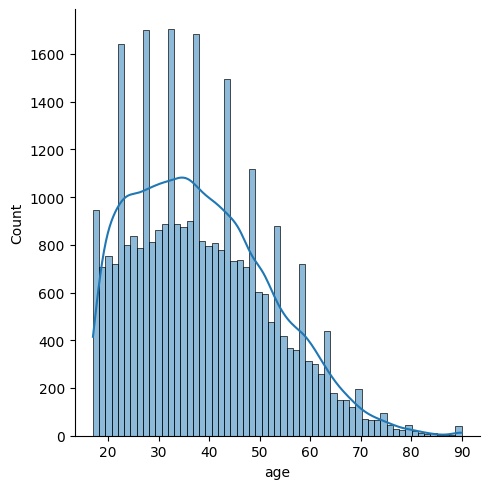

In [11]:
sns.displot(cens.age,kde=True)

Observation --> We observe that our data is has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases and do not have any null values in the age column.

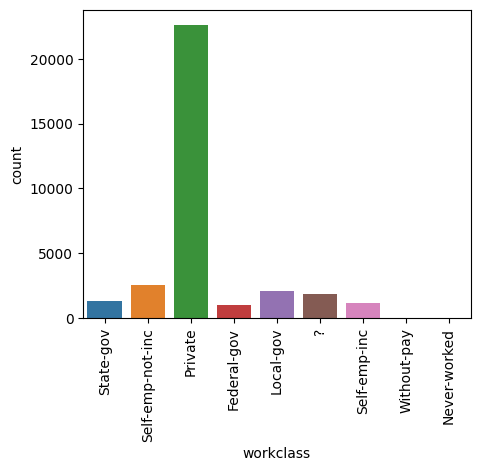

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="workclass")
plt.xticks(rotation = 90)
plt.show()

Observation --> We observe that majority of the people belong to ‘Private’ sector workclass.

In [19]:
cens[cens['workclass'] == "?"].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


Observation --> the values where ‘Workclass’ is missing, also has ‘Occupation’ missing!

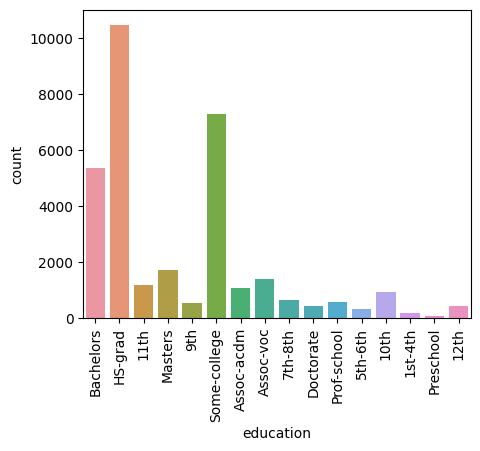

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="education")
plt.xticks(rotation = 90)
plt.show()

Observation --> We observe no missing values in this column, and also find out that majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

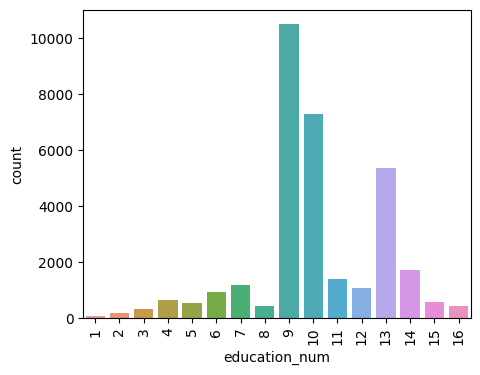

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="education_num")
plt.xticks(rotation = 90)
plt.show()

Observation --> the count of ‘Education’ column and ‘Education_num’ is exactly same! Which means, the ‘Education_num’ column is providing same information as ‘Education’ column, but in a numeric manner

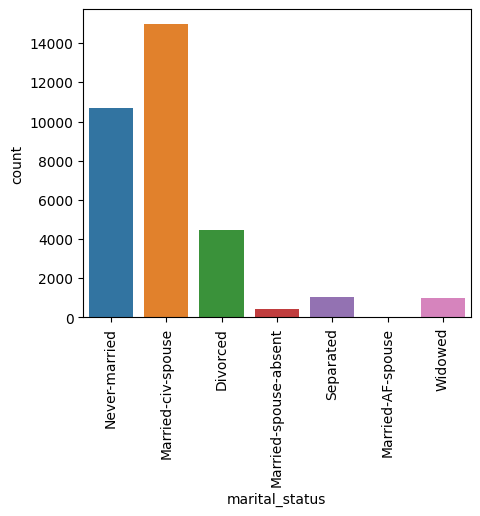

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="marital_status")
plt.xticks(rotation = 90)
plt.show()

Observation --> no missing values and count of ‘Never-married’ is also quite high.

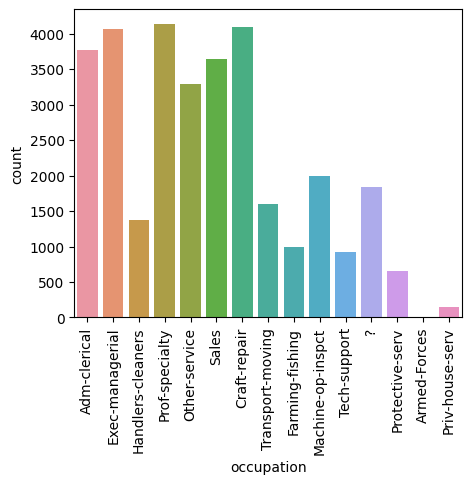

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="occupation")
plt.xticks(rotation = 90)
plt.show()

Observation --> the count of missing values is slightly higher than ‘Workclass’ column — 1843

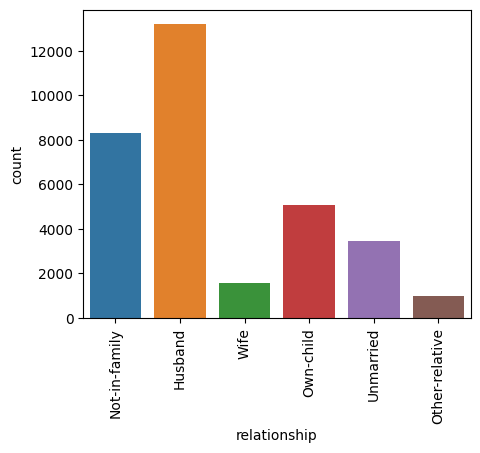

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="relationship")
plt.xticks(rotation = 90)
plt.show()

Observation --> relationship column does not have any missing value.

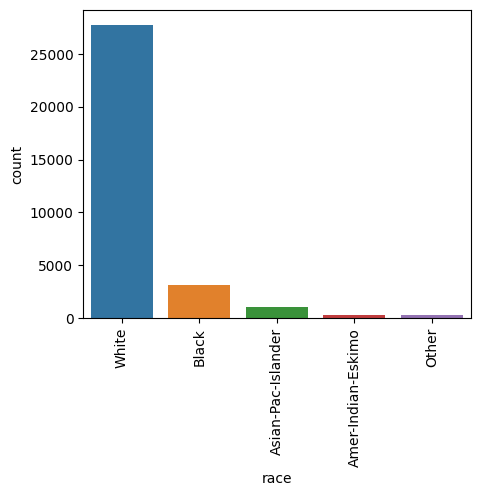

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="race")
plt.xticks(rotation = 90)
plt.show()

Observation -->  Highest number of people have race as ‘White’.

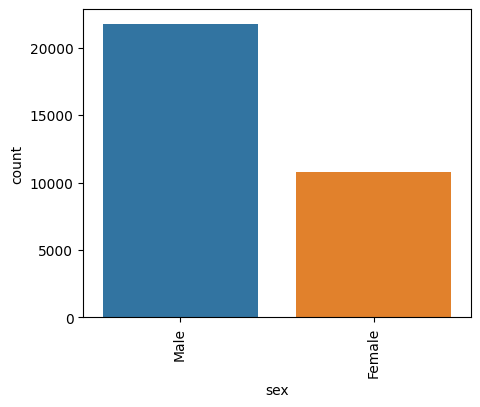

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x="sex")
plt.xticks(rotation = 90)
plt.show()

Observation --> Missing values are not found in this column.

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_11708\842290726.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cens.capital_gain,kde=True)


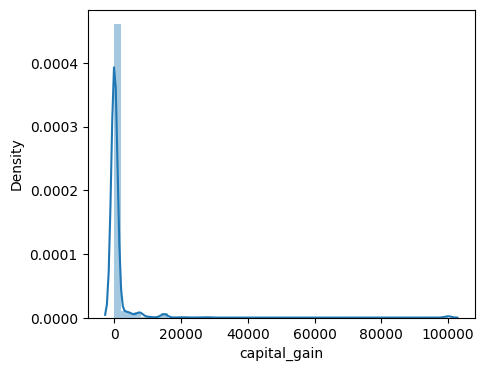

In [28]:
plt.figure(figsize=(5,4))
sns.distplot(cens.capital_gain,kde=True)
plt.show()

Observation --> 'Capital_gain' column is a numeric column, with majority of the values set as 0. The distribution plot for ‘Capital_gain’ column is highly right skewed.

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_11708\3170230309.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cens.capital_loss,kde=True)


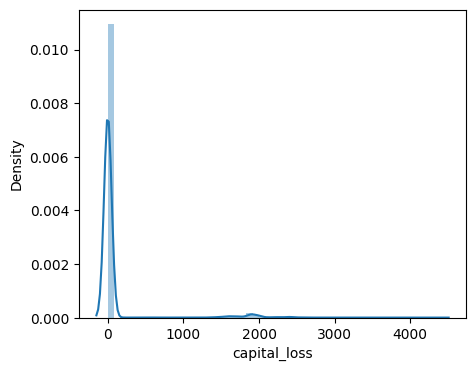

In [29]:
plt.figure(figsize=(5,4))
sns.distplot(cens.capital_loss,kde=True)
plt.show()

Obervation --> The ‘Capital_loss’ column also has majority of the values set as 0, similar to ‘Capital_gains’. The data is highly right skewed in this case as well.

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_11708\2108206206.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cens.hours_per_week,kde=True)


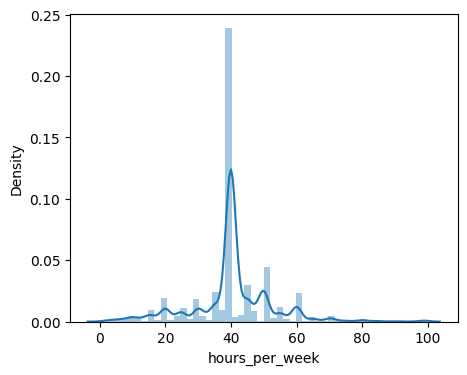

In [30]:
plt.figure(figsize=(5,4))
sns.distplot(cens.hours_per_week,kde=True)
plt.show()

Observation --> The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak 

<Figure size 1000x400 with 0 Axes>

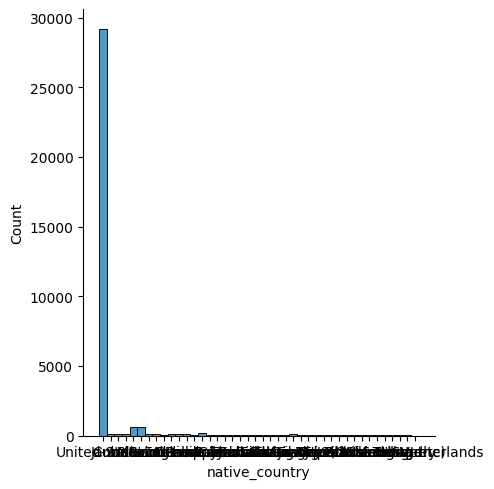

In [34]:
plt.figure(figsize=(10,4))
# sns.distplot(cens.native_country,kde=True)
sns.displot(data=cens,x='native_country')
plt.show()

Observation --> have 583 missing values in this column

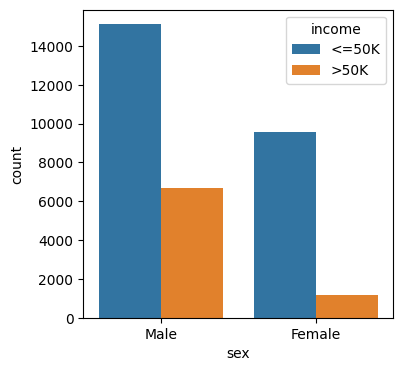

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(data=cens, x='sex', hue='income')
plt.show()

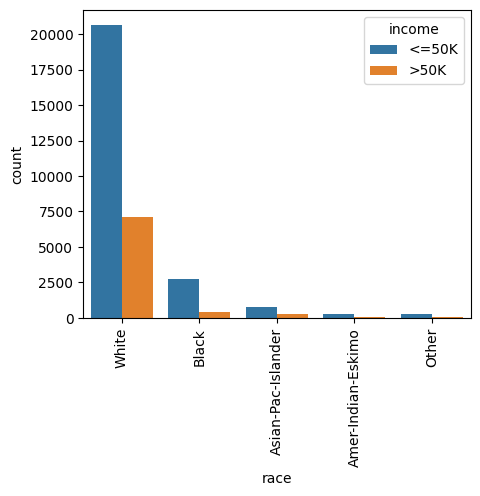

In [47]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x='race', hue='income')
plt.xticks(rotation=90)
plt.show()

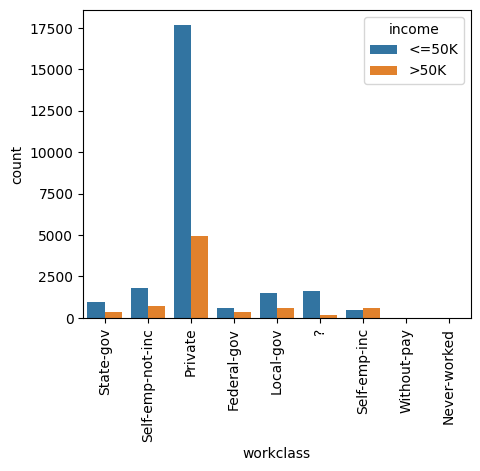

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x='workclass', hue='income')
plt.xticks(rotation=90)
plt.show()

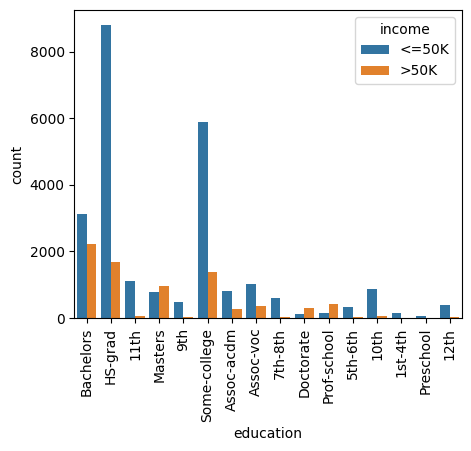

In [45]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x='education', hue='income')
plt.xticks(rotation=90)
plt.show()

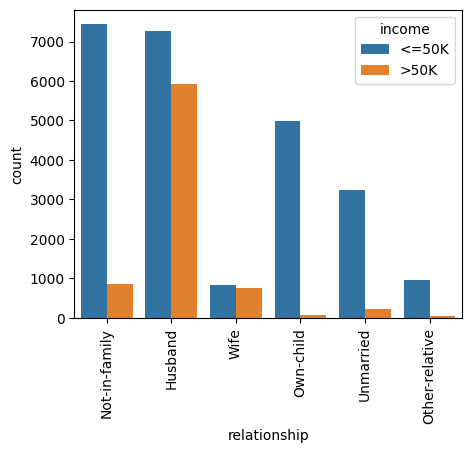

In [48]:
plt.figure(figsize=(5,4))
sns.countplot(data=cens, x='relationship', hue='income')
plt.xticks(rotation=90)
plt.show()

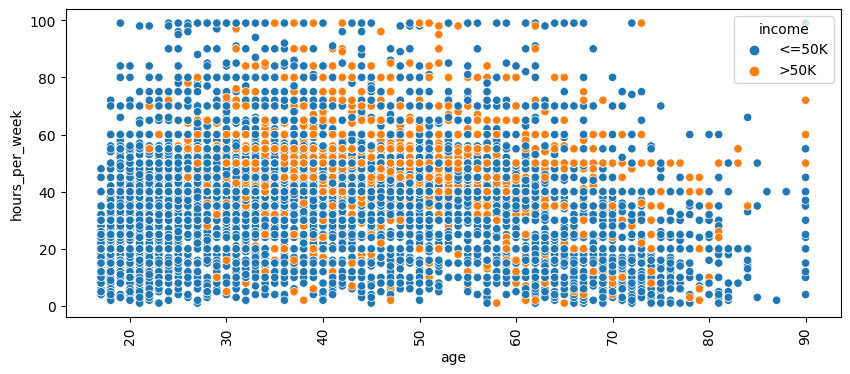

In [50]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=cens, x='age',y='hours_per_week', hue='income')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.heatmap(cens.corr(),vmin=0.0,vmax=1.0, annot=True, fmt=".1f")

we make the following conclusions –

1. A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.

2. Males have a higher chance of earning more than 50K, than females.

3. Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.

4. People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.

5. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.

6. From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours_per_week to earn >50K.

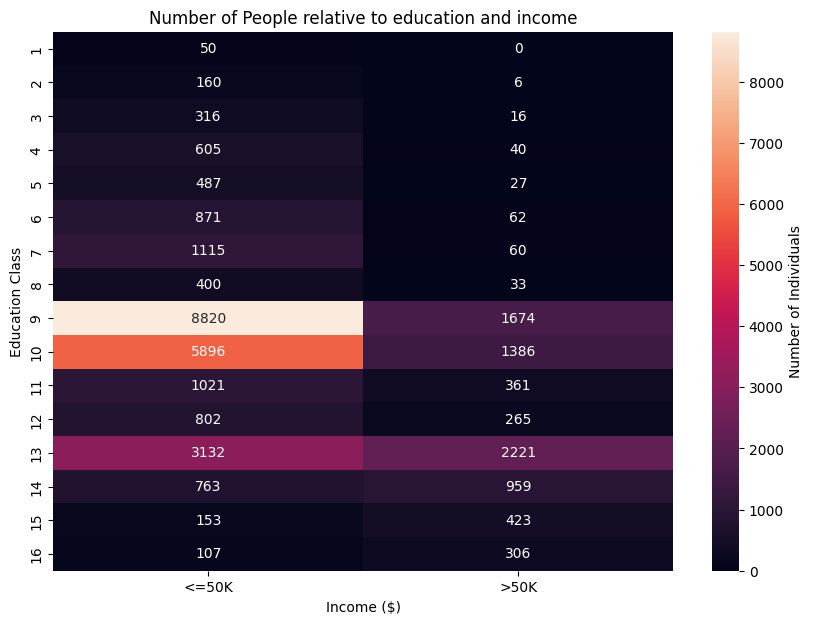

In [66]:
## Heatmap 

plt.figure(figsize = [10,7])
ct_counts = cens.groupby(['education_num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_num', columns = 'income', values = 'count').fillna(0)

sns.heatmap(ct_counts,annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title("Number of People relative to education and income")
plt.xlabel('Income ($)')
plt.ylabel('Education Class')
plt.show()

In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

### **Data Preprocessing**

Replacing missing values

In [70]:
cens['workclass'] = cens['workclass'].replace("?", cens['workclass'].value_counts().keys()[0])
cens['occupation'] = cens['occupation'].replace("?", cens['occupation'].value_counts().keys()[0])
cens['native_country']= cens['native_country'].replace("?", cens['native_country'].value_counts().keys()[0])

Combining the data logically to reduce categories

In [72]:
data = cens.copy()

In [77]:
# data['workclass'] = data['workclass'].apply(lambda x : 'Without-pay' if x == 'Never-worked' else x)
# data['workclass'] = data['workclass'].apply(lambda x : 'Gov' if x in ['State-gov','Local-gov'] else x)
# data['workclass'] = data['workclass'].apply(lambda x : 'Private' if x == 'Self-emp-not-inc' else x)

In [78]:
data['workclass'].unique()

array(['Gov', 'Private', 'Federal-gov', 'Self-emp-inc', 'Without-pay'],
      dtype=object)

In [83]:
# data['education'] = data['education'].apply(lambda x : 'School' if x in ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'] else x)
# data['education'] = data['education'].apply(lambda x : 'College' if x in ['HS-grad','Some-college'] else x)
# data['education'] = data['education'].apply(lambda x : 'Doctorate' if x in ['Doctorate', 'Prof-school'] else x)
# data['education'] = data['education'].apply(lambda x : 'Assoc' if x in ['Assoc-acdm', 'Assoc-voc'] else x)

In [87]:
data['education'].unique()

array(['Bachelors', 'College', 'School', 'Masters', 'Assoc', 'Doctorate'],
      dtype=object)

In [88]:
# data['marital_status'] = data['marital_status'].apply(lambda x : 'No spouse' if x in ['Divorced','Married-spouse-absent', 'Separated','Married-AF-spouse','Widowed'] else x)

In [89]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'No spouse'], dtype=object)

In [92]:
# data['relationship'] = data['relationship'].apply(lambda x : 'Other' if x in ['Not-in-family', 'Own-child', 'Unmarried','Other-relative'] else x)

In [93]:
data['relationship'].unique()

array(['Other', 'Husband', 'Wife'], dtype=object)

In [95]:
# data['race'] = data['race'].apply(lambda x : 'Other' if x in [ 'Amer-Indian-Eskimo','Other'] else x)

In [97]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other'], dtype=object)

In [104]:
# data['income'] = data['income'].apply(lambda x : int(1) if x == '>50K' else int(0) )

In [105]:
data['income'].unique()
# '<=50K' --> 0
# '>50K' --> 1

array([0, 1], dtype=int64)

Outlier Detection

In [110]:
num_cols = data.columns[data.dtypes != "O"]

In [114]:
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

<Axes: xlabel='age'>

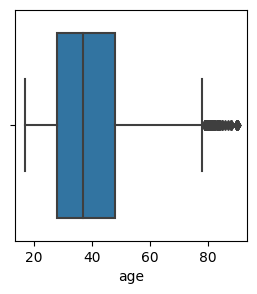

In [124]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x = 'age')

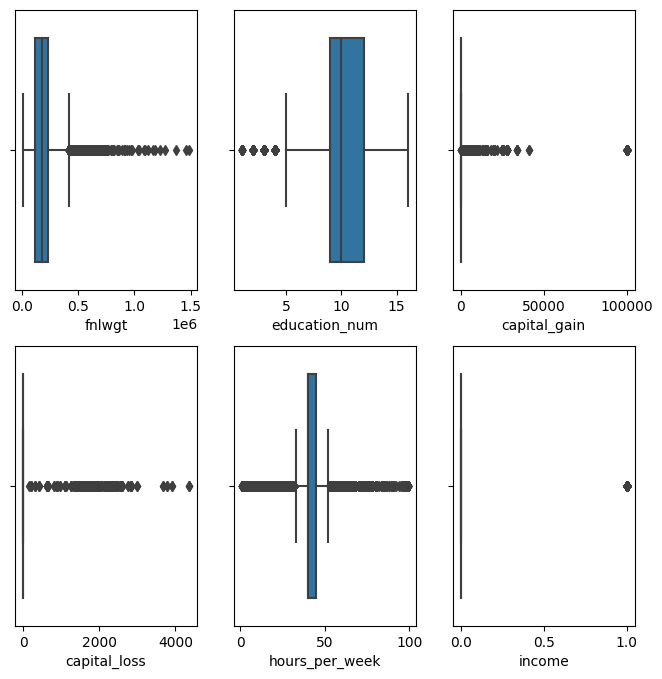

In [122]:
plt.figure(figsize=(8,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.boxplot(data=data, x = num_cols[i])
    plt.xlabel(num_cols[i])

Observation --> all numerical feature have outliers. Use Z-score ((also called a standard score) gives an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.) to confirm how much data, out of the complete dataset, falls in an outlier range.

Skewness treatment

We now proceed with treating skewness in our data, which allows us to fit our data in a symmetric distribution, which further allows our model to learn better.

In [126]:
data.skew(numeric_only=True)      # skewness without any transformation

age                0.557663
fnlwgt             1.447703
education_num     -0.309500
capital_gain      11.949403
capital_loss       4.592702
hours_per_week     0.228759
income             1.211687
dtype: float64

In [127]:
#(sqrt transform for Fnlwgt column), and (cbrt transform for Capital_gain and Capital_loss columns twice)

In [132]:
data['fnlwgt_sqrt'] = np.sqrt(data['fnlwgt'])
# data['fnlwgt_sqrt2'] = np.sqrt(data['fnlwgt_sqrt'])  # no need mistakely done

In [129]:
data['capital_gain_cbrt1'] = np.cbrt(data['capital_gain'])
data['capital_gain_cbrt2'] = np.cbrt(data['capital_gain_cbrt1'])

data['capital_loss_cbrt1'] = np.cbrt(data['capital_loss'])
data['capital_loss_cbrt2'] = np.cbrt(data['capital_loss_cbrt1'])

In [143]:
# data = data.drop(columns=['fnlwgt_sqrt2'], axis=1)

In [144]:
data.skew(numeric_only=True)

age                    0.557663
fnlwgt                 1.447703
education_num         -0.309500
capital_gain          11.949403
capital_loss           4.592702
hours_per_week         0.228759
income                 1.211687
fnlwgt_sqrt            0.189648
capital_gain_cbrt1     4.097819
capital_gain_cbrt2     3.101039
capital_loss_cbrt1     4.335231
capital_loss_cbrt2     4.302934
dtype: float64

In [133]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,income,fnlwgt_sqrt,capital_gain_cbrt1,capital_gain_cbrt2,capital_loss_cbrt1,capital_loss_cbrt2,fnlwgt_sqrt2
0,39,Gov,77516,Bachelors,13,Never-married,Adm-clerical,Other,White,Male,...,0,40,United-States,0,278.416954,12.954476,2.348587,0.0,0.0,16.685831
1,50,Private,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,0,288.636450,0.000000,0.000000,0.0,0.0,16.989304


In [149]:
data['fnlwgt'] = data['fnlwgt_sqrt']

In [150]:
data['capital_gain'] = data['capital_gain_cbrt2']
data['capital_loss'] = data['capital_loss_cbrt2']

In [152]:
data.drop(labels=['fnlwgt_sqrt','capital_gain_cbrt1','capital_gain_cbrt2','capital_loss_cbrt1',	'capital_loss_cbrt2'], axis=1, inplace=True)

In [153]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Other,White,Male,2.348587,0.0,40,United-States,0
1,50,Private,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,464.377002,College,9,No spouse,Handlers-cleaners,Other,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,484.480134,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0


In [154]:
data.to_csv(path_or_buf= os.path.join("d:\\CensusIncome-Predictor\\notebooks\\data","adult_ini.csv"),index=False)